# Optimal airbnb rental 



- Monthly mortgage payment ($1000).
- Renovation cost ($60,000).
- Occupancy rate (varies by month).
- Airbnb fees (percentage of the nightly rate).



## Mathematical Formulation
We want to determine the optimal nightly rate $p$ for an Airbnb rental to minimize the debt over a horizon of $y$ years. 

The parameters and variables are defined as follows:

- $M$: Monthly mortgage payment ($1000)

- $C$: Renovation cost ($60,000)

- $F$: Airbnb fee percentage (0.15)

- $O$: Occupancy rate (0.75)

- $y$: Horizon in years

- $m$: Total number of months in the horizon ($y×12$)



The monthly revenue $R$ from renting the property is:

$$𝑅
(
𝑝
)
=
𝑝
×
30
×
𝑂
×
(
1
−
𝐹
)
R(p)=p×30×O×(1−F)
$$

The objective function is to minimize the total debt after $m$ months:

Minimize

$$  
𝐷(𝑝)=𝑀×𝑚+𝐶−∑𝑖=1𝑚𝑅(𝑝) MinimizeD(p)=M×m+C−∑ i=1m *R(p)
 $$

In [1]:
import numpy as np 
import pyomo.environ as pyo


In [2]:

# Define parameters
mortgage_payment = 1000  # monthly mortgage payment in dollars
renovation_cost = 60000  # one-time renovation cost in dollars
airbnb_fee_percent = 0.15  # Airbnb fee as a percentage of nightly rate
occupancy_rate = 0.75  # average monthly occupancy rate
years = 5  # horizon in years
months = years * 12  # total number of months in the horizon

# Create a Concrete Model
model = pyo.ConcreteModel()

# Decision variable: nightly rate
model.nightly_rate = pyo.Var(domain=pyo.NonNegativeReals)

# Define the revenue function
def revenue(model):
    nightly_rate = model.nightly_rate
    monthly_revenue = (nightly_rate * 30 * occupancy_rate) * (1 - airbnb_fee_percent)
    return monthly_revenue

# Define the objective function: minimize debt
def objective_rule(model):
    total_revenue = sum(revenue(model) for _ in range(months))
    total_expenses = mortgage_payment * months + renovation_cost
    return total_expenses - total_revenue

model.objective = pyo.Objective(rule=objective_rule, sense=pyo.minimize)

# Define the solver
solver = pyo.SolverFactory('glpk')

# Solve the model
results = solver.solve(model)

# Display the results
nightly_rate_optimal = pyo.value(model.nightly_rate)
print(f"The optimal nightly rate to minimize debt over {years} years is ${nightly_rate_optimal:.2f}")


ERROR: evaluating object as numeric value: nightly_rate
        (object: <class 'pyomo.core.base.var.ScalarVar'>)
    No value for uninitialized NumericValue object nightly_rate


ValueError: No value for uninitialized NumericValue object nightly_rate

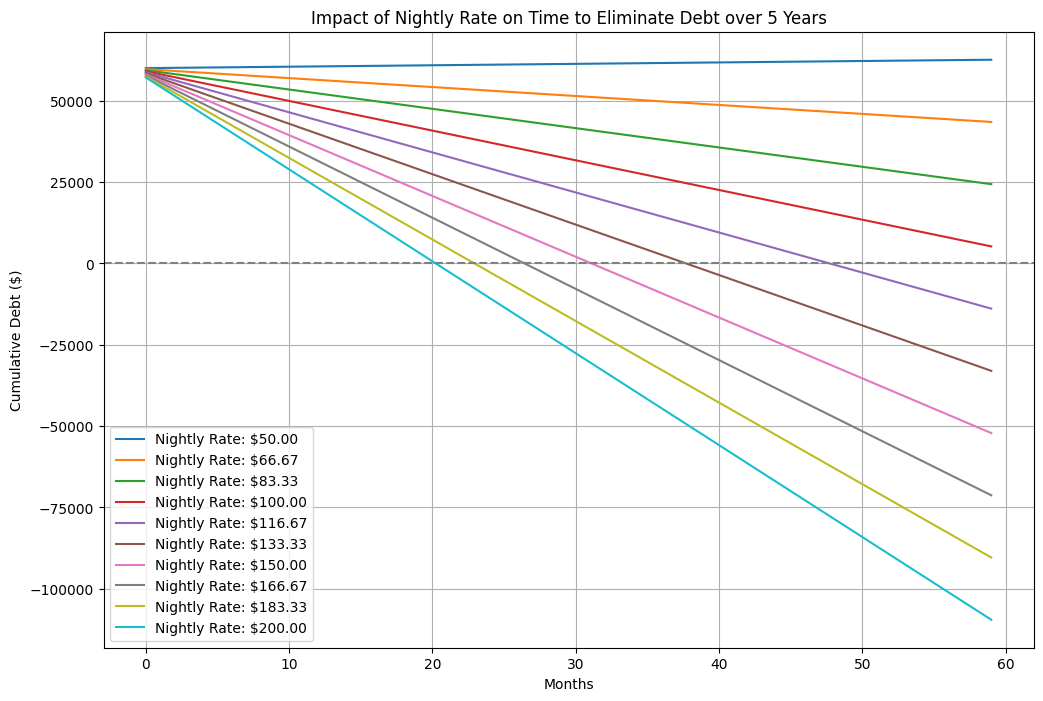

In [3]:
import pyomo.environ as pyo
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
mortgage_payment = 1000  # monthly mortgage payment in dollars
renovation_cost = 60000  # one-time renovation cost in dollars
airbnb_fee_percent = 0.15  # Airbnb fee as a percentage of nightly rate
occupancy_rate = 0.75  # average monthly occupancy rate

def calculate_cumulative_debt(nightly_rate, months):
    cumulative_debt = []
    total_debt = renovation_cost
    monthly_revenue = (nightly_rate * 30 * occupancy_rate) * (1 - airbnb_fee_percent)
    
    for month in range(months):
        total_debt += mortgage_payment - monthly_revenue
        cumulative_debt.append(total_debt)
        
    return cumulative_debt

# Function to plot cumulative debt over time for different nightly rates
def plot_cumulative_debt(years):
    months = years * 12  # total number of months in the horizon
    nightly_rates = np.linspace(50, 200, 10)

    plt.figure(figsize=(12, 8))

    for rate in nightly_rates:
        debt_over_time = calculate_cumulative_debt(rate, months)
        plt.plot(range(months), debt_over_time, label=f'Nightly Rate: ${rate:.2f}')

    plt.xlabel('Months')
    plt.ylabel('Cumulative Debt ($)')
    plt.title(f'Impact of Nightly Rate on Time to Eliminate Debt over {years} Years')
    plt.axhline(0, color='gray', linestyle='--')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example: Plot for a 5-year horizon
plot_cumulative_debt(5)

# You can change the number of years to see different horizons
# plot_cumulative_debt(3)
# plot_cumulative_debt(10)


The optimal nightly rate to minimize debt over 5 years is $100.00


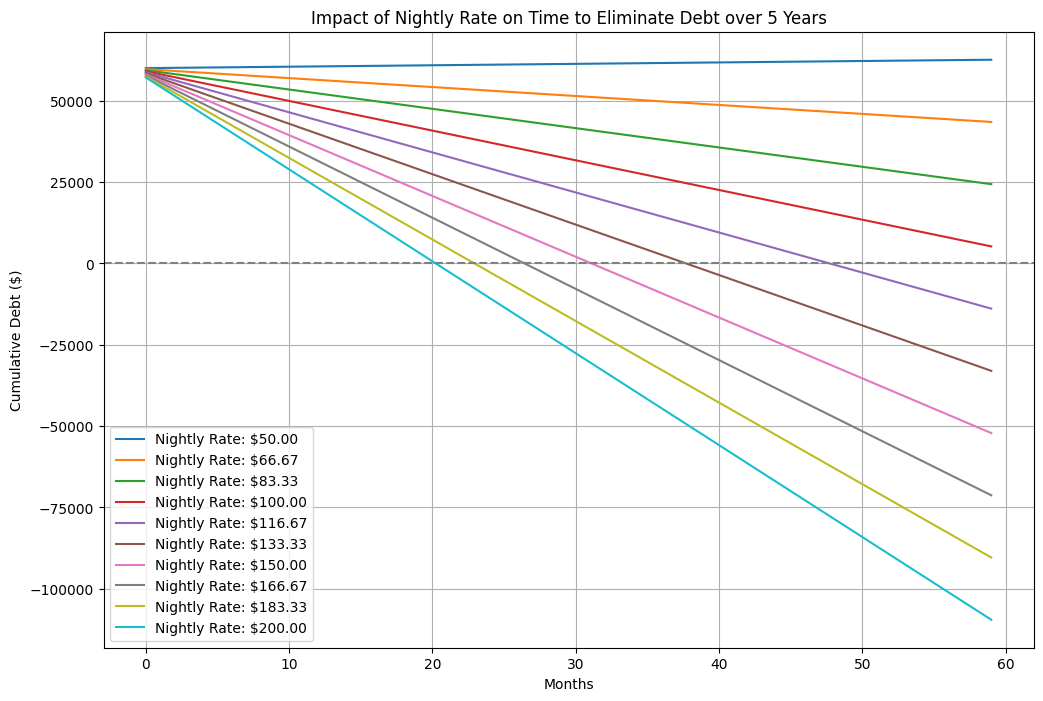

In [4]:
import pyomo.environ as pyo
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
mortgage_payment = 1000  # monthly mortgage payment in dollars
renovation_cost = 60000  # one-time renovation cost in dollars
airbnb_fee_percent = 0.15  # Airbnb fee as a percentage of nightly rate
occupancy_rate = 0.75  # average monthly occupancy rate

# Function to calculate cumulative debt over time
def calculate_cumulative_debt(nightly_rate, months):
    cumulative_debt = []
    total_debt = renovation_cost
    monthly_revenue = (nightly_rate * 30 * occupancy_rate) * (1 - airbnb_fee_percent)
    
    for month in range(months):
        total_debt += mortgage_payment - monthly_revenue
        cumulative_debt.append(total_debt)
        
    return cumulative_debt

# Function to plot cumulative debt over time for different nightly rates
def plot_cumulative_debt(years):
    months = years * 12  # total number of months in the horizon
    nightly_rates = np.linspace(50, 200, 10)

    plt.figure(figsize=(12, 8))

    for rate in nightly_rates:
        debt_over_time = calculate_cumulative_debt(rate, months)
        plt.plot(range(months), debt_over_time, label=f'Nightly Rate: ${rate:.2f}')

    plt.xlabel('Months')
    plt.ylabel('Cumulative Debt ($)')
    plt.title(f'Impact of Nightly Rate on Time to Eliminate Debt over {years} Years')
    plt.axhline(0, color='gray', linestyle='--')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create the optimization model
def optimize_nightly_rate(years):
    months = years * 12  # total number of months in the horizon

    # Create a Concrete Model
    model = pyo.ConcreteModel()

    # Decision variable: nightly rate
    model.nightly_rate = pyo.Var(domain=pyo.NonNegativeReals, initialize=100)

    # Define the revenue function
    def revenue(model):
        nightly_rate = model.nightly_rate
        monthly_revenue = (nightly_rate * 30 * occupancy_rate) * (1 - airbnb_fee_percent)
        return monthly_revenue

    # Define the objective function: minimize debt
    def objective_rule(model):
        total_revenue = sum(revenue(model) for _ in range(months))
        total_expenses = mortgage_payment * months + renovation_cost
        return total_expenses - total_revenue

    model.objective = pyo.Objective(rule=objective_rule, sense=pyo.minimize)

    # Define the solver
    solver = pyo.SolverFactory('glpk')

    # Solve the model
    results = solver.solve(model)

    # Display the results
    nightly_rate_optimal = pyo.value(model.nightly_rate)
    print(f"The optimal nightly rate to minimize debt over {years} years is ${nightly_rate_optimal:.2f}")
    return nightly_rate_optimal

# Example: Optimize for a 5-year horizon and plot results
optimal_rate = optimize_nightly_rate(5)
plot_cumulative_debt(5)


The optimal nightly rate to maximize revenue over 5 years is $100.00


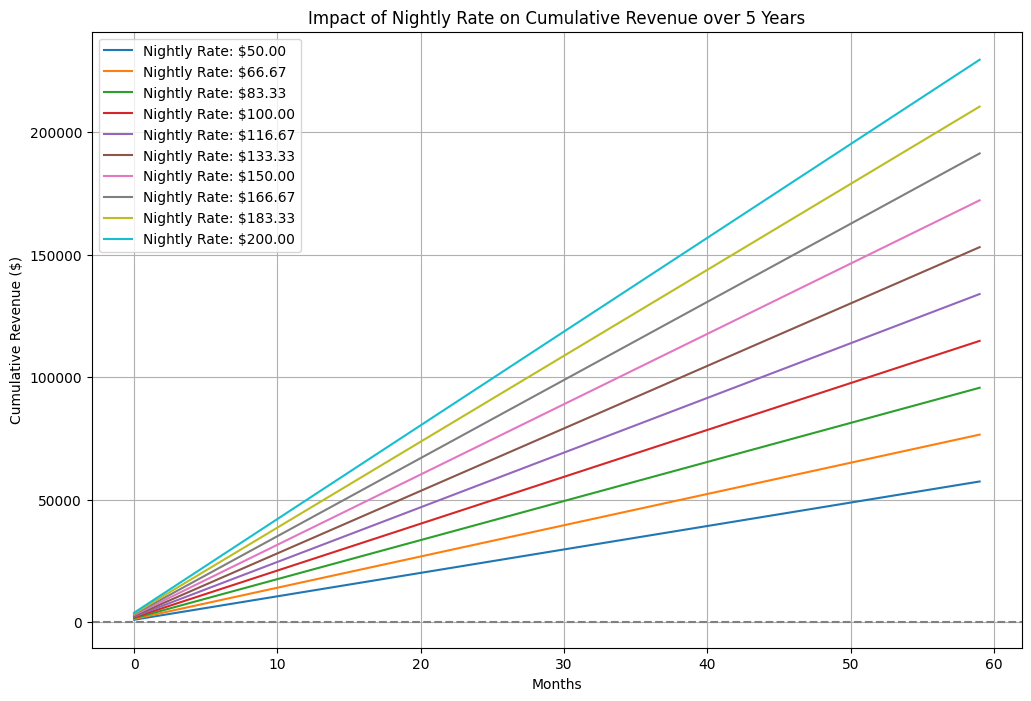

In [6]:
import pyomo.environ as pyo
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
mortgage_payment = 1000  # monthly mortgage payment in dollars
renovation_cost = -60000  # one-time renovation cost in dollars
airbnb_fee_percent = 0.15  # Airbnb fee as a percentage of nightly rate
occupancy_rate = 0.75  # average monthly occupancy rate

def calculate_cumulative_revenue(nightly_rate, months):
    cumulative_revenue = []
    total_revenue = 0
    total_debt = renovation_cost
    monthly_revenue = (nightly_rate * 30 * occupancy_rate) * (1 - airbnb_fee_percent)
    
    for month in range(months):
      total_debt =  total_debt+ mortgage_payment - monthly_revenue
    cumulative_debt.append(total_debt)
        
    return cumulative_revenue

# Function to plot cumulative revenue over time for different nightly rates
def plot_cumulative_revenue(years):
    months = years * 12  # total number of months in the horizon
    nightly_rates = np.linspace(50, 200, 10)

    plt.figure(figsize=(12, 8))

    for rate in nightly_rates:
        revenue_over_time = calculate_cumulative_revenue(rate, months)
        plt.plot(range(months), revenue_over_time, label=f'Nightly Rate: ${rate:.2f}')

    plt.xlabel('Months')
    plt.ylabel('Cumulative Revenue ($)')
    plt.title(f'Impact of Nightly Rate on Cumulative Revenue over {years} Years')
    plt.axhline(0, color='gray', linestyle='--')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create the optimization model
def optimize_nightly_rate(years):
    months = years * 12  # total number of months in the horizon

    # Create a Concrete Model
    model = pyo.ConcreteModel()

    # Decision variable: nightly rate
    model.nightly_rate = pyo.Var(domain=pyo.NonNegativeReals, initialize=100)

    # Define the revenue function
    def revenue(model):
        nightly_rate = model.nightly_rate
        monthly_revenue = (nightly_rate * 30 * occupancy_rate) * (1 - airbnb_fee_percent)
        return monthly_revenue

    # Define the objective function: maximize revenue
    def objective_rule(model):
        total_revenue = sum(revenue(model) for _ in range(months))
        return total_revenue

    model.objective = pyo.Objective(rule=objective_rule, sense=pyo.maximize)

    # Define the solver
    solver = pyo.SolverFactory('glpk')

    # Solve the model
    results = solver.solve(model)

    # Display the results
    nightly_rate_optimal = pyo.value(model.nightly_rate)
    print(f"The optimal nightly rate to maximize revenue over {years} years is ${nightly_rate_optimal:.2f}")
    return nightly_rate_optimal

# Example: Optimize for a 5-year horizon and plot results
optimal_rate = optimize_nightly_rate(5)
plot_cumulative_revenue(5)

# You can change the number of years to see different horizons
# optimal_rate = optimize_nightly_rate(3)
# plot_cumulative_revenue(3)

# optimal_rate = optimize_nightly_rate(10)
# plot_cumulative_revenue(10)


In [15]:
def plot_cumulative_debt_and_revenue(years):
    months = years * 12  # total number of months in the horizon
    nightly_rates = np.linspace(50, 200, 10)

    fig, ax1 = plt.subplots(figsize=(12, 8))

    for rate in nightly_rates:
        debt_over_time, monthly_revenue = calculate_cumulative_debt(rate, months)
        ax1.plot(range(months), debt_over_time, label=f'Nightly Rate: ${rate:.2f}')

    ax1.set_xlabel('Months')
    ax1.set_ylabel('Cumulative Debt ($)', color='tab:blue')
    ax1.set_title(f'Impact of Nightly Rate on Debt and Revenue over {years} Years')
    ax1.axhline(0, color='gray', linestyle='--')
    ax1.legend()
    ax1.grid(True)

    ax2 = ax1.twinx()  # instantiate a second y-axis sharing the same x-axis
    ax2.set_ylabel('Monthly Revenue ($)', color='tab:red')
    for rate in nightly_rates:
        _, monthly_revenue = calculate_cumulative_debt(rate, months)
        ax2.plot(range(months), [monthly_revenue] * months, linestyle='dashed', label=f'Revenue: ${rate:.2f}')

    fig.tight_layout()  # to avoid overlapping of labels
    plt.show()




# Function to plot cumulative debt over time for different nightly rates
def plot_cumulative_debt_only(years):
    months = years * 12  # total number of months in the horizon
    nightly_rates = np.linspace(50, 200, 10)

    plt.figure(figsize=(12, 8))

    for rate in nightly_rates:
        debt_over_time = calculate_cumulative_debt(rate, months)
        plt.plot(range(months), debt_over_time, label=f'Nightly Rate: ${rate:.2f}')

    plt.xlabel('Months')
    plt.ylabel('Cumulative Debt ($)')
    plt.title(f'Impact of Nightly Rate on Time to Eliminate Debt over {years} Years')
    plt.axhline(0, color='gray', linestyle='--')
    plt.legend()
    plt.grid(True)
    plt.show()

The optimal nightly rate to maximize revenue over 1 years is $100.00


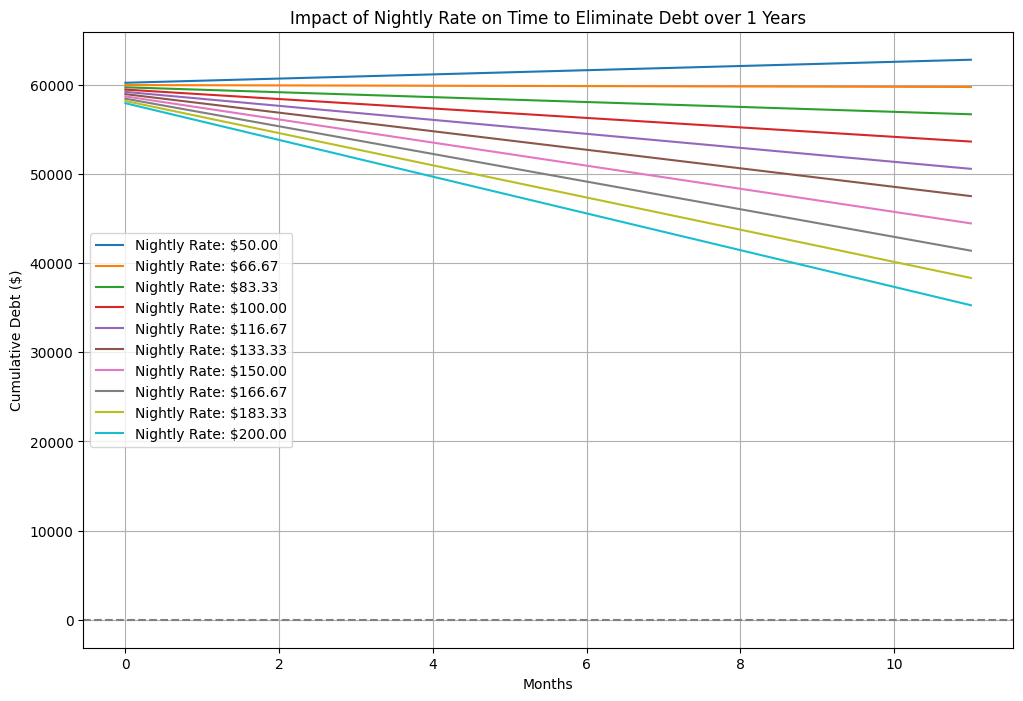

The optimal nightly rate to maximize revenue over 1 years is $100.00


ValueError: too many values to unpack (expected 2)

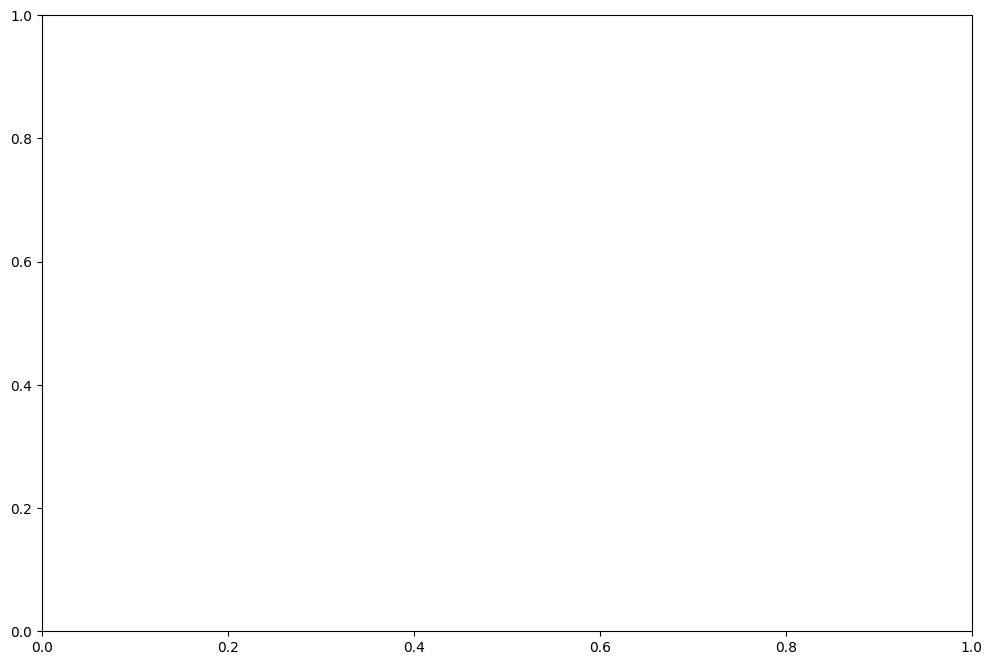

In [16]:
import pyomo.environ as pyo
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
mortgage_payment = 1000  # monthly mortgage payment in dollars
renovation_cost = 60000  # one-time renovation cost in dollars
airbnb_fee_percent = 0.15  # Airbnb fee as a percentage of nightly rate
occupancy_rate = 0.75  # average monthly occupancy rate
cleaning_fee = 0.20

# Function to calculate cumulative debt over time
def calculate_cumulative_debt(nightly_rate, months):
    cumulative_debt = []
    total_debt = renovation_cost
    monthly_revenue = (nightly_rate * 30 * occupancy_rate) * (1 - airbnb_fee_percent) *(1-cleaning_fee)
    
    for month in range(months):
        total_debt = total_debt + mortgage_payment - monthly_revenue
        cumulative_debt.append(total_debt)
        
    return cumulative_debt



# Create the optimization model
def optimize_nightly_rate(years):
    months = years * 12  # total number of months in the horizon

    # Create a Concrete Model
    model = pyo.ConcreteModel()

    # Decision variable: nightly rate
    model.nightly_rate = pyo.Var(domain=pyo.NonNegativeReals, initialize=100)

    # Define the revenue function
    def revenue(model):
        nightly_rate = model.nightly_rate
        monthly_revenue = (nightly_rate * 30 * occupancy_rate) * (1 - airbnb_fee_percent)
        return monthly_revenue

    # Define the objective function: maximize revenue while accounting for debt
    def objective_rule(model):
        total_revenue = sum(revenue(model) for _ in range(months))
        total_debt = mortgage_payment * months + renovation_cost
        return total_revenue - total_debt

    model.objective = pyo.Objective(rule=objective_rule, sense=pyo.maximize)

    # Define the solver
    solver = pyo.SolverFactory('glpk')

    # Solve the model
    results = solver.solve(model)

    # Display the results
    nightly_rate_optimal = pyo.value(model.nightly_rate)
    print(f"The optimal nightly rate to maximize revenue over {years} years is ${nightly_rate_optimal:.2f}")
    return nightly_rate_optimal

# Example: Optimize for a 5-year horizon and plot results
optimal_rate = optimize_nightly_rate(1)
plot_cumulative_debt(1)

# You can change the number of years to see different horizons
# optimal_rate = optimize_nightly_rate(3)
# plot_cumulative_debt(3)

# optimal_rate = optimize_nightly_rate(10)
# plot_cumulative_debt(10)

optimal_rate = optimize_nightly_rate(1)
plot_cumulative_debt_and_revenue(1)

The optimal nightly rate to maximize revenue over 5 years is $100.00


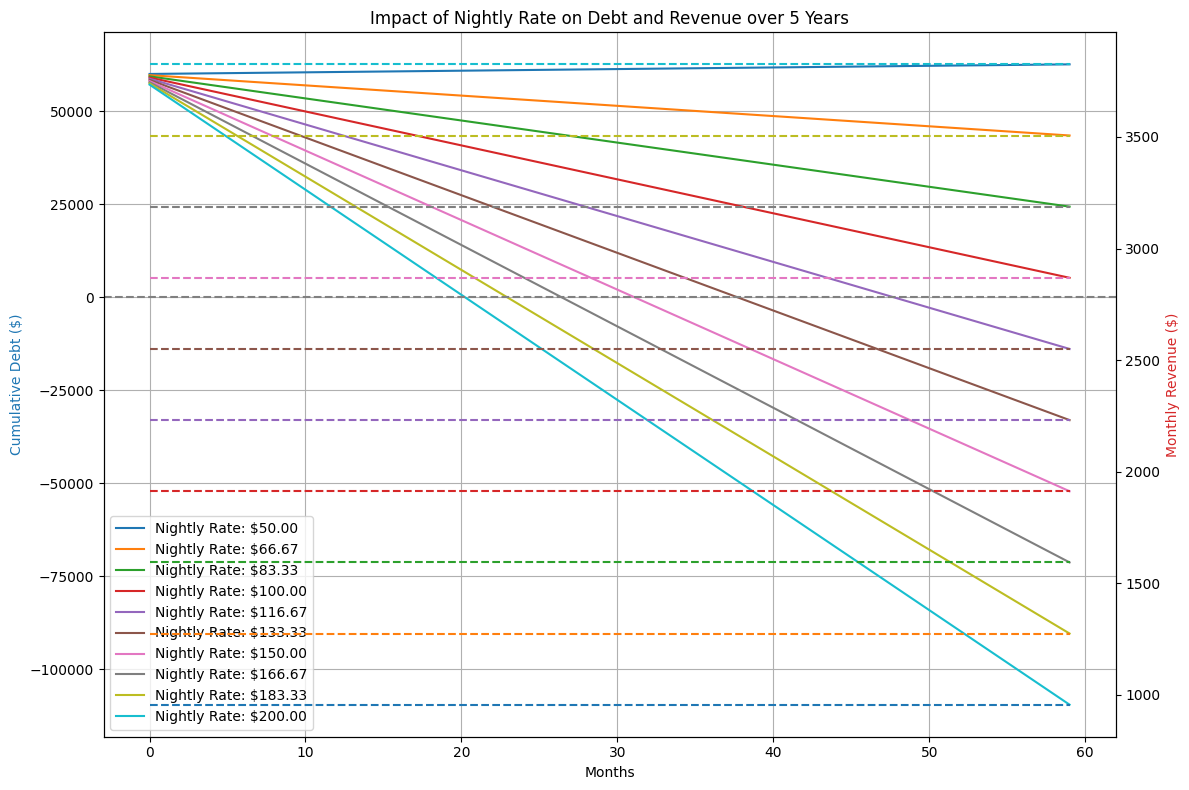

The optimal nightly rate to maximize revenue over 5 years is $100.00


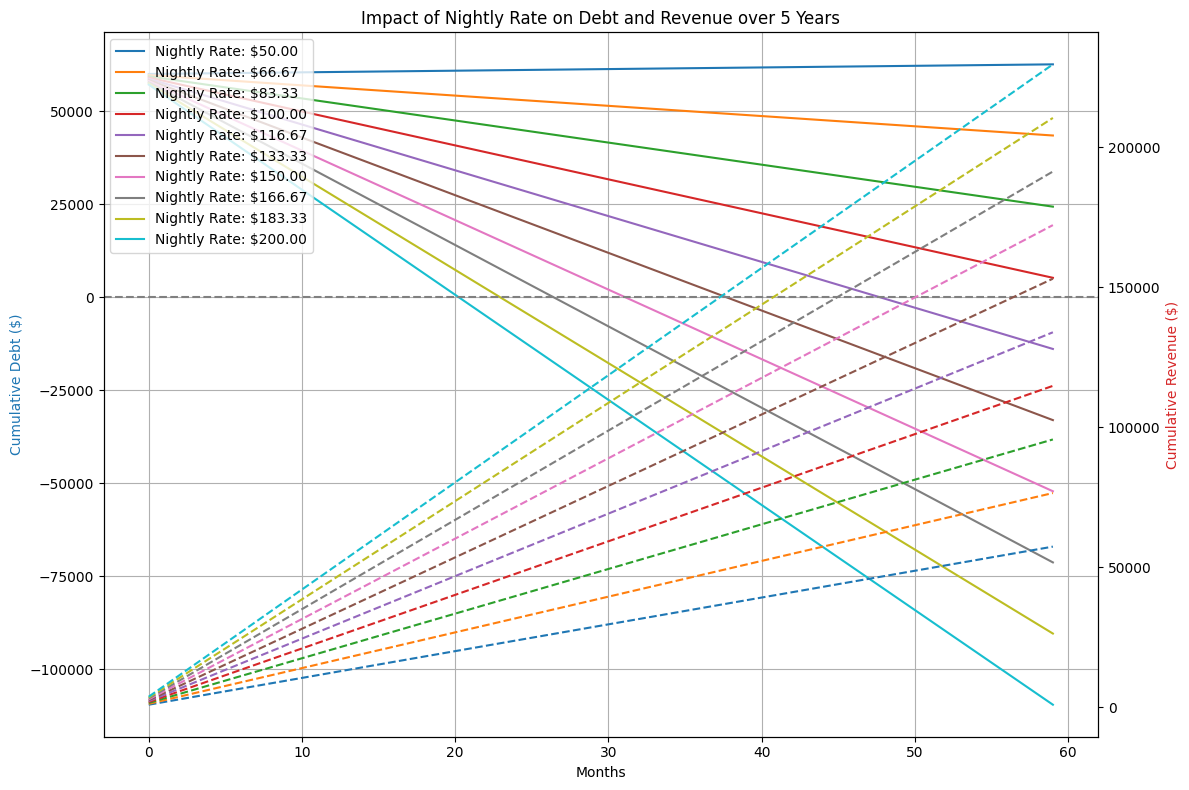

In [18]:
import pyomo.environ as pyo
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
mortgage_payment = 1000  # monthly mortgage payment in dollars
renovation_cost = 60000  # one-time renovation cost in dollars
airbnb_fee_percent = 0.15  # Airbnb fee as a percentage of nightly rate
occupancy_rate = 0.75  # average monthly occupancy rate

# Function to calculate cumulative debt and revenue over time
def calculate_cumulative_debt_and_revenue(nightly_rate, months):
    cumulative_debt = []
    cumulative_revenue = []
    total_debt = renovation_cost
    total_revenue = 0
    monthly_revenue = (nightly_rate * 30 * occupancy_rate) * (1 - airbnb_fee_percent)
    
    for month in range(months):
        total_debt += mortgage_payment - monthly_revenue
        total_revenue += monthly_revenue
        cumulative_debt.append(total_debt)
        cumulative_revenue.append(total_revenue)
        
    return cumulative_debt, cumulative_revenue

# Function to plot cumulative debt and revenue over time for different nightly rates
def plot_cumulative_debt_and_revenue(years):
    months = years * 12  # total number of months in the horizon
    nightly_rates = np.linspace(50, 200, 10)

    fig, ax1 = plt.subplots(figsize=(12, 8))

    for rate in nightly_rates:
        debt_over_time, revenue_over_time = calculate_cumulative_debt_and_revenue(rate, months)
        ax1.plot(range(months), debt_over_time, label=f'Nightly Rate: ${rate:.2f}')

    ax1.set_xlabel('Months')
    ax1.set_ylabel('Cumulative Debt ($)', color='tab:blue')
    ax1.set_title(f'Impact of Nightly Rate on Debt and Revenue over {years} Years')
    ax1.axhline(0, color='gray', linestyle='--')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    ax2 = ax1.twinx()  # instantiate a second y-axis sharing the same x-axis
    ax2.set_ylabel('Cumulative Revenue ($)', color='tab:red')
    for rate in nightly_rates:
        _, revenue_over_time = calculate_cumulative_debt_and_revenue(rate, months)
        ax2.plot(range(months), revenue_over_time, linestyle='dashed', label=f'Revenue: ${rate:.2f}')

    fig.tight_layout()  # to avoid overlapping of labels
    plt.show()

# Create the optimization model
def optimize_nightly_rate(years):
    months = years * 12  # total number of months in the horizon

    # Create a Concrete Model
    model = pyo.ConcreteModel()

    # Decision variable: nightly rate
    model.nightly_rate = pyo.Var(domain=pyo.NonNegativeReals, initialize=100)

    # Define the revenue function
    def revenue(model):
        nightly_rate = model.nightly_rate
        monthly_revenue = (nightly_rate * 30 * occupancy_rate) * (1 - airbnb_fee_percent)
        return monthly_revenue

    # Define the objective function: maximize revenue while accounting for debt
    def objective_rule(model):
        total_revenue = sum(revenue(model) for _ in range(months))
        total_debt = mortgage_payment * months + renovation_cost
        return total_revenue - total_debt

    model.objective = pyo.Objective(rule=objective_rule, sense=pyo.maximize)

    # Define the solver
    solver = pyo.SolverFactory('glpk')

    # Solve the model
    results = solver.solve(model)

    # Display the results
    nightly_rate_optimal = pyo.value(model.nightly_rate)
    print(f"The optimal nightly rate to maximize revenue over {years} years is ${nightly_rate_optimal:.2f}")
    return nightly_rate_optimal

# Example: Optimize for a 5-year horizon and plot results
optimal_rate = optimize_nightly_rate(5)
plot_cumulative_debt_and_revenue(5)

# You can change the number of years to see different horizons
# optimal_rate = optimize_nightly_rate(3)
# plot_cumulative_debt_and_revenue(3)

# optimal_rate = optimize_nightly_rate(10)
# plot_cumulative_debt_and_revenue(10)


In [21]:
# Function to calculate cumulative debt and revenue over time
def calculate_cumulative_debt_and_revenue(nightly_rate, months):
    cumulative_debt = []
    cumulative_revenue = []
    total_debt = renovation_cost
    total_revenue = 0
    monthly_revenue = (nightly_rate * 30 * occupancy_rate) * (1 - airbnb_fee_percent)
    
    for month in range(months):
        total_debt += mortgage_payment - monthly_revenue
        total_revenue += monthly_revenue
        cumulative_debt.append(total_debt)
        cumulative_revenue.append(total_revenue)
        
    return pd.Da'cumulative_debt':cumulative_debt, 'cumulative_revenue':cumulative_revenue}




In [20]:
nightly_rate = 30
calculate_cumulative_debt_and_revenue(nightly_rate, months)

([60426.25,
  60852.5,
  61278.75,
  61705.0,
  62131.25,
  62557.5,
  62983.75,
  63410.0,
  63836.25,
  64262.5,
  64688.75,
  65115.0,
  65541.25,
  65967.5,
  66393.75,
  66820.0,
  67246.25,
  67672.5,
  68098.75,
  68525.0,
  68951.25,
  69377.5,
  69803.75,
  70230.0,
  70656.25,
  71082.5,
  71508.75,
  71935.0,
  72361.25,
  72787.5,
  73213.75,
  73640.0,
  74066.25,
  74492.5,
  74918.75,
  75345.0,
  75771.25,
  76197.5,
  76623.75,
  77050.0,
  77476.25,
  77902.5,
  78328.75,
  78755.0,
  79181.25,
  79607.5,
  80033.75,
  80460.0,
  80886.25,
  81312.5,
  81738.75,
  82165.0,
  82591.25,
  83017.5,
  83443.75,
  83870.0,
  84296.25,
  84722.5,
  85148.75,
  85575.0],
 [573.75,
  1147.5,
  1721.25,
  2295.0,
  2868.75,
  3442.5,
  4016.25,
  4590.0,
  5163.75,
  5737.5,
  6311.25,
  6885.0,
  7458.75,
  8032.5,
  8606.25,
  9180.0,
  9753.75,
  10327.5,
  10901.25,
  11475.0,
  12048.75,
  12622.5,
  13196.25,
  13770.0,
  14343.75,
  14917.5,
  15491.25,
  16065.0,
  166